In [1]:
# Importação das bibliotecas
import cv2
import os
import glob
import pathlib
import numpy as np 
from skimage import filters
from matplotlib import pyplot as plt

In [2]:
def load_data(datadir):
    img_array = []
    path = os.path.join(datadir)
    path_list  = list(os.listdir(path))
    for img in path_list:
        img_array.append(cv2.imread(os.path.join(path, img)))
    return img_array

imgs_seg = load_data('imagens-cor-segmentacao')

#### Watershed

https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

https://pyimagesearch.com/2015/11/02/watershed-opencv/

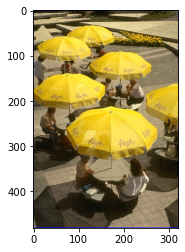

In [5]:
def watershed(img):
    # Binarização Otsu (negativo)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    threshold = filters.threshold_otsu(gray)
    binarized_img = (gray < threshold)*1
    binarized_img = binarized_img.astype('uint8')
    
    # Operação de abertura
    kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    opening_ellipse = cv2.morphologyEx(binarized_img, cv2.MORPH_OPEN, kernel_ellipse, iterations = 2)
    
    # Operação de Dilatação
    dilate_ellipse = cv2.dilate(opening_ellipse, kernel_ellipse, iterations = 3)
    
    # Determinando a área do primeiro plano
    dist_transform = cv2.distanceTransform(opening_ellipse, cv2.DIST_L2,5)
    
    # Binarização Otsu
    threshold1 = filters.threshold_otsu(dist_transform)
    binarized_img1 = (dist_transform > threshold1)*1
    
    # Subtração das imagens
    binarized_img1 = np.uint8(binarized_img1)
    img_subtract = cv2.subtract(dilate_ellipse, binarized_img1)
    
    # Cria um marcador para rotular as regiões dos objetos e fundo.
    ret, markers = cv2.connectedComponents(binarized_img1)
    
    # Define o rótulo do fundo como 1
    markers = markers+1
    
    # Define o rótulo das regiões desconhecidas como 0
    markers[img_subtract==255] = 0
    markers = cv2.watershed(img, markers)
    
    # Aplica o watershed
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255,0,0]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

image_watershed = watershed(imgs_seg[0])
plt.imshow(image_watershed)

In [21]:
#!pip install import-ipynb

In [22]:
"""import import_ipynb
#from Untitled1 import plotImage
import Untitled1
Untitled1.plotImage(image_watershed, image_watershed, image_watershed, image_watershed)"""

'import import_ipynb\n#from Untitled1 import plotImage\nimport Untitled1\nUntitled1.plotImage(image_watershed, image_watershed, image_watershed, image_watershed)'